In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Which of $k$ chip brands sold at a convenience store are "the best"? 

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***. 

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$). 

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [3]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations 
# of this multinomial random variable, and note it's relationship to `n`

array([5, 3, 1, 1])

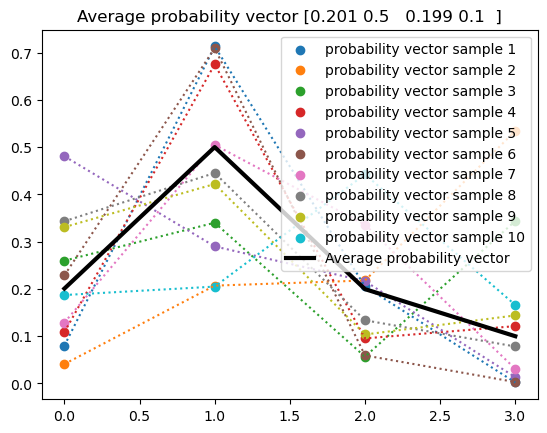

In [4]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector"); 
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

[double click and replace this with your answer]

$x^{(t)}$ would be a list of the number of purchases for each brand of chips in the store. The list would represent a count for the number of bags of chips purchased for each brand at time t. At time 0 there would be no chips purchased so the list would be only zeros. At each time increment the number of bags purchases for each brand would be updated and would represent all bags purchased for each brand up to time t. So generally over time we would expect each entry of the list to increase, the more popular brands faster. 

2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your belief about the "best chips" at time $t$ according to a Bayesian analysis.


[double click and replace this with your answer]

The distribution would be a Dirichlet distribution with the parameter being the list of number of bags sold for each brand up to time t. 

3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$. 

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each. 

In [16]:
j=1
stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0,j] # replace this with coding sampling from p_j|x

0.5038259539949439

4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

In [21]:
# this can be done with for loops, or something like `...rvs(size=100000)[:,j]`

q=0.1
(stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000)[:,j]>q).mean() 

0.99903

5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$. 


In [24]:
np.quantile(stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000)[:,j],[0.025,0.975])

array([0.21344361, 0.78728773])

6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

In [37]:
samples = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000)
j,jprime=1,2
(samples[:,j]>samples[:,jprime]).mean() # replace this with coding the comparison of p_j|x and p_k|x

0.89095

7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


In [39]:
samples = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000)
j,jprime=1,2
ratios = samples[:,j]/samples[:,jprime]
np.quantile(ratios,[0.025,0.975])


array([ 0.55805386, 22.11106521])

8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$. 

In [43]:
samples = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000)
j,jprime=1,2
differencej_jp = samples[:,j] - samples[:,jprime]
np.quantile(differencej_jp,[0.025,0.975])


array([-0.19129816,  0.71689823])

9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?


In [46]:
p = np.array([0.397,0.4,0.2,0.002,0.001])
print(p[1]/p[2],p[1]-p[2],p[3]/p[4],p[3]-p[4])

2.0 0.2 2.0 0.001


[double click and replace this with your answer]

The ratio $\frac{p_j}{p_{j'}}$ is releveant as we use it to see the relative difference between the variables.
The absolute difference $p_j - p_{j'}$ matters as we get to see actual scale of the difference between the variables

With j,j' = (2,3) the ratio and difference are 2.0 and 0.2 respectively while with j,j' = (4,5) they are 2.0 and 0.001. So while the ratio between the parameters are the same, the absolute difference between them is very different. 

10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining 
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


[double click and replace this with your answer]

Because $p_4$ and $p_5$ are very small, t should be large enough so that enough data is collected to provide good inference. Issues could arise if we do not have enough data, for example we could collect no data on chip brand 5 and then the resulting $p_5$ would be zero causing us to divide by zero.